# Proyecto EDA - Jonathan B.

## **Introducción y objetivo**

**Enfoque elegido:** Evolución global de la energía renovable.

**Justificación:**
La evolución temporal de la energía renovable permite evaluar el avance real de la transición energética, identificar cambios de ritmo y extraer conclusiones relevantes para la toma de decisiones estratégicas.

**Historia a contar:**
Analizar cómo ha cambiado la producción/consumo de energía renovable a lo largo del tiempo, detectando tendencias, puntos de inflexión y posibles periodos de estancamiento.

## **Fuente de datos**

**Dataset elegido:** Share of final energy use that comes from renewable sources — Our World in Data (CSV)

**Fuente:** Our World in Data presenta datos globales de energía, incluyendo métricas de participación de energías renovables en el consumo total de energía.

**URL de descarga propuesta:**
- https://archive.ourworldindata.org/20260130-180113/grapher/share-of-final-energy-consumption-from-renewable-sources.html
  
**Preguntas clave a partir de los datos:**
1. ¿Cómo ha evolucionado la energía renovable a nivel global a lo largo del tiempo?
2. ¿Se identifican periodos de crecimiento acelerado?
3. ¿Existen fases de estancamiento o desaceleración?

## **Carga de datos**

In [41]:
import pandas as pd       # Para manipulación de datos
import matplotlib.pyplot as plt  # Para gráficos básicos
import seaborn as sns     # Para visualizaciones más avanzadas
import missingno as msno

# Opcional: para que los gráficos se vean dentro del notebook
%matplotlib inline

# Estilo de Seaborn para gráficos
sns.set_style(style="whitegrid")

In [42]:
# Carga CSV
csv_path = "dataset/share-of-final-energy-consumption-from-renewable-sources.csv"
df = pd.read_csv(csv_path)

# Información y estadísticas
df.info()
df.describe()

# Primer vistazo
df.head(10)


<class 'pandas.DataFrame'>
RangeIndex: 5599 entries, 0 to 5598
Data columns (total 4 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            5599 non-null   str    
 1   Code                                                              5185 non-null   str    
 2   Year                                                              5599 non-null   int64  
 3   Renewable energy share in the total final energy consumption (%)  5599 non-null   float64
dtypes: float64(1), int64(1), str(2)
memory usage: 175.1 KB


,Entity,Code,Year,Renewable energy share in the total final energy consumption (%)
0,Afghanistan,AFG,2000,44.99
1,Afghanistan,AFG,2001,45.60
2,Afghanistan,AFG,2002,37.83
3,Afghanistan,AFG,2003,36.66
4,Afghanistan,AFG,2004,44.24
5,Afghanistan,AFG,2005,33.88
6,Afghanistan,AFG,2006,31.89
7,Afghanistan,AFG,2007,28.78
8,Afghanistan,AFG,2008,21.17
9,Afghanistan,AFG,2009,16.53


In [43]:
# Comprobamos que no existen nulos
print(df.isnull().sum())


Entity                                                                0
Code                                                                414
Year                                                                  0
Renewable energy share in the total final energy consumption (%)      0
dtype: int64


## **Limpieza y preprocesado**

In [44]:
# Filtrar solo datos globales
df_global = df[df['Entity'] == 'World'].copy()
df_global.reset_index(drop=True, inplace=True)  # Reiniciar el índice

# Renombrar columnas para trabajar más cómodo
df_global.rename(columns={
    'Renewable energy share in the total final energy consumption (%)': 'renewable_share'
}, inplace=True)

df_global.head(10)

,Entity,Code,Year,renewable_share
0,World,OWID_WRL,2000,15.71
1,World,OWID_WRL,2001,15.41
2,World,OWID_WRL,2002,15.38
3,World,OWID_WRL,2003,15.21
4,World,OWID_WRL,2004,14.93
5,World,OWID_WRL,2005,14.83
6,World,OWID_WRL,2006,14.87
7,World,OWID_WRL,2007,14.70
8,World,OWID_WRL,2008,14.82
9,World,OWID_WRL,2009,15.22


## **Análisis univariante/bivariante**

In [63]:
# Incremento absoluto año a año
df_global['annual_change'] = df_global['renewable_share'].diff()
# Crecimiento porcentual anual
df_global['annual_growth_pct'] = df_global['renewable_share'].pct_change() * 100

# Visión rápida de los datos para trabajar
df_global = df_global[['Year', 'renewable_share', 'annual_change', 'annual_growth_pct']]
df_global.to_csv("dataset/global_renewable_share.csv", index=False)


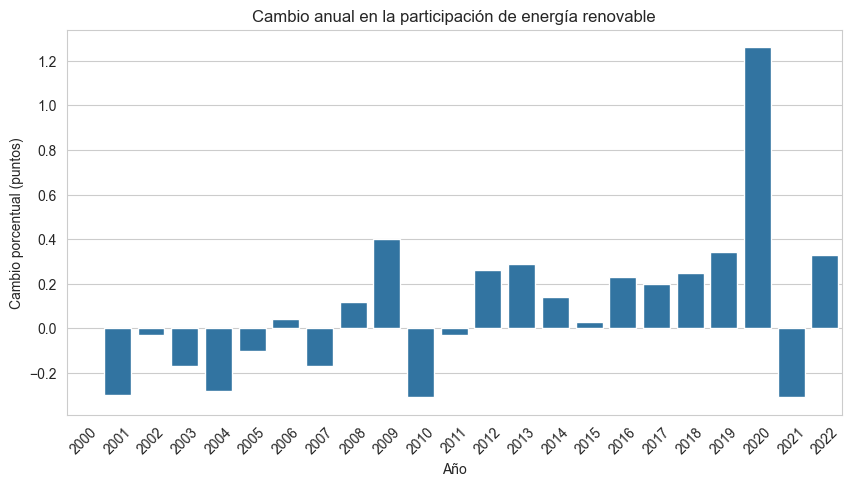

In [46]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_global, x='Year', y='annual_change')
plt.title("Cambio anual en la participación de energía renovable")
plt.xlabel("Año")
plt.ylabel("Cambio porcentual (puntos)")
plt.xticks(rotation = 45)
plt.savefig("assets/annual_change.png")
plt.show()

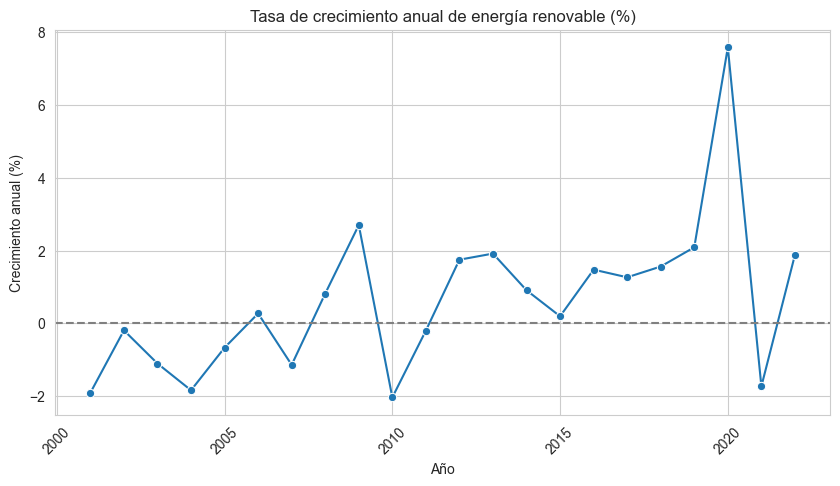

In [47]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_global, x='Year', y='annual_growth_pct', marker='o')
plt.title("Tasa de crecimiento anual de energía renovable (%)")
plt.xlabel("Año")
plt.ylabel("Crecimiento anual (%)")
plt.axhline(y=0, color = 'gray',linestyle = '--')
plt.xticks(rotation = 45)
plt.savefig("assets/growth_rate.png")
plt.show()

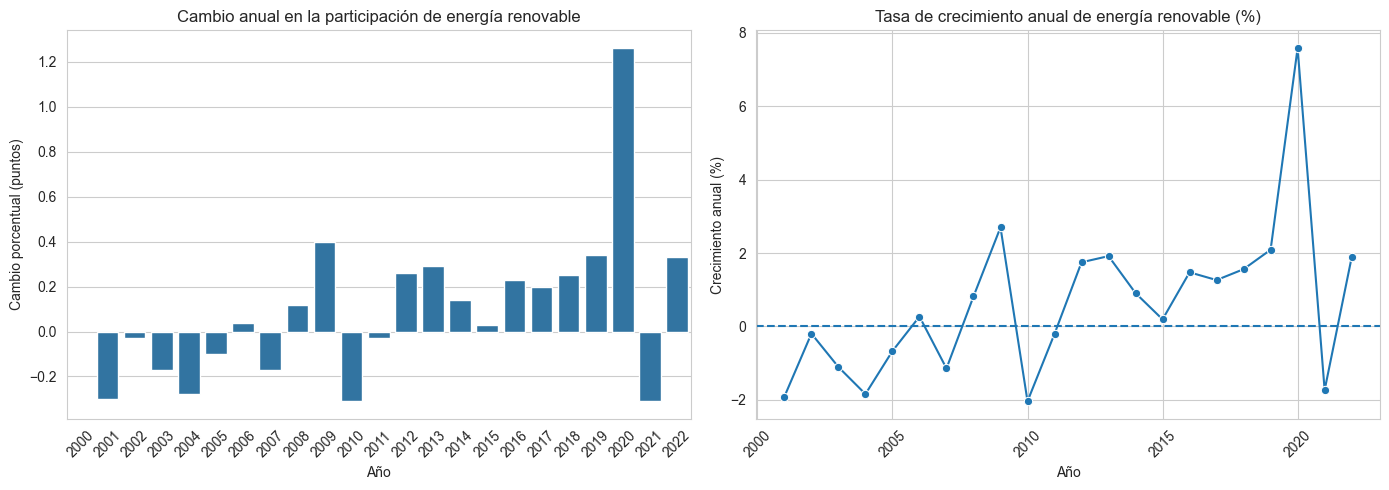

In [48]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Figura 1
sns.barplot(data=df_global, x='Year', y='annual_change', ax=axes[0])

axes[0].set_title('Cambio anual en la participación de energía renovable')
axes[0].set_ylabel('Cambio porcentual (puntos)')
axes[0].set_xlabel('Año')
axes[0].tick_params(axis='x', rotation=45)

# Figura 2
sns.lineplot(data=df_global, x='Year', y='annual_growth_pct', marker='o')

axes[1].axhline(0, linestyle='--')
axes[1].set_title('Tasa de crecimiento anual de energía renovable (%)')
axes[1].set_ylabel('Crecimiento anual (%)')
axes[1].set_xlabel('Año')
axes[1].tick_params(axis='x', rotation=45)

plt.savefig("assets/AnnualChange_vs_GrowthRAte_.png")
plt.tight_layout()
plt.show()


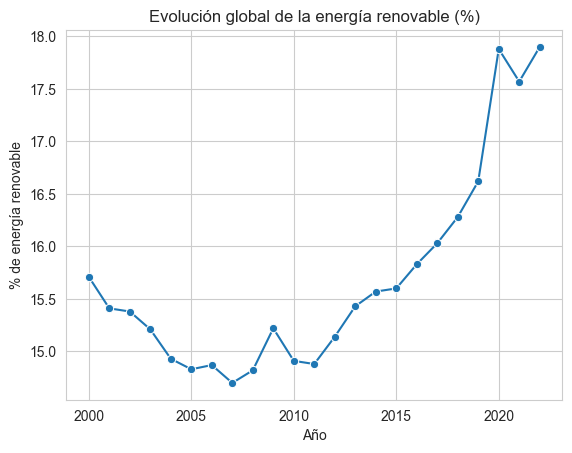

In [49]:
# Figura 3 - Tendencia global 
sns.lineplot(data=df_global, x='Year', y='renewable_share', marker='o')

plt.title('Evolución global de la energía renovable (%)')
plt.ylabel('% de energía renovable')
plt.xlabel('Año')
plt.grid(True)
plt.savefig("assets/evolution_global.png")
plt.show()

# **Análisis global por fuente de energía renovable**

## **Fuente de datos**

**Dataset elegido:** Modern renewable energy consumption — Our World in Data (CSV)

**Fuente:** Our World in Data presenta datos globales de energía, incluyendo métricas de participación de energías renovables en el consumo total por fuente de energía.

**URL de descarga propuesta:**
- https://ourworldindata.org/grapher/modern-renewable-energy-consumption
  
**Objetivo:** Entender qué fuentes renovables están impulsando el crecimiento global y cómo ha cambiado su peso relativo con el tiempo.

**Preguntas clave a partir de los datos:**
1. ¿Qué fuentes renovables parecen impulsar el crecimiento global?
2. ¿Cómo ha evolucionado la energía solar en el tiempo?
3. ¿Cómo ha evolucionado la hidráulica solar en el tiempo?
4. ¿Cómo ha evolucionado la eólica solar en el tiempo?
5. ¿Qué fuente crece más rápido?
6. ¿Qué fuentes ganan peso relativo?
7. ¿Cuáles pierden protagonismo?



In [50]:
# Carga CSV
csv_path2 = "dataset/modern-renewable-energy-consumption.csv"
df = pd.read_csv(csv_path2)

# Información y estadísticas
df.info()
df.describe()

# Primer vistazo
df.head(10)

<class 'pandas.DataFrame'>
RangeIndex: 6405 entries, 0 to 6404
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            6405 non-null   str    
 1   Code              4545 non-null   str    
 2   Year              6405 non-null   int64  
 3   Other renewables  6405 non-null   float64
 4   Solar             6405 non-null   float64
 5   Wind              6405 non-null   float64
 6   Hydropower        6405 non-null   float64
dtypes: float64(4), int64(1), str(2)
memory usage: 350.4 KB


,Entity,Code,Year,Other renewables,Solar,Wind,Hydropower
0,Africa,NaN,1965,0.000,0.0,0.0,13.905635
1,Africa,NaN,1966,0.000,0.0,0.0,15.510004
2,Africa,NaN,1967,0.000,0.0,0.0,16.190636
3,Africa,NaN,1968,0.000,0.0,0.0,18.938341
4,Africa,NaN,1969,0.000,0.0,0.0,22.100890
5,Africa,NaN,1970,0.000,0.0,0.0,27.630430
6,Africa,NaN,1971,0.164,0.0,0.0,26.013391
7,Africa,NaN,1972,0.165,0.0,0.0,29.633196
8,Africa,NaN,1973,0.170,0.0,0.0,31.345707
9,Africa,NaN,1974,0.175,0.0,0.0,35.667076


In [51]:
print(df.isnull().sum())

Entity                 0
Code                1860
Year                   0
Other renewables       0
Solar                  0
Wind                   0
Hydropower             0
dtype: int64


In [65]:
# Filtrar solo datos globales y coherencia con datos a partir de 2000
df_global2 = df[df['Entity'] == 'World'].copy()
df_global2.reset_index(drop=True, inplace=True)  # Reiniciar el índice

df_global2 = df_global2[['Year', 'Hydropower', 'Solar', 'Wind','Other renewables']] #Simplificamos la base para su trabajo

# conversión para power
df_tech_long = df_global2.melt(
    id_vars="Year",
    value_vars=["Hydropower", "Solar", "Wind", "Other renewables"],
    var_name="Technology",
    value_name="Energy_TWh"
)

df_tech_long.to_csv("dataset/renewables_by_technology.csv", index=False)


df_global2.head(15)

,Year,Hydropower,Solar,Wind,Other renewables
0,1965,923.19806,0.0,0.000,17.985231
1,1966,983.81696,0.0,0.000,19.806007
2,1967,1005.74240,0.0,0.000,19.986570
3,1968,1059.28870,0.0,0.000,22.120045
4,1969,1121.74240,0.0,0.000,23.257965
5,1970,1174.64970,0.0,0.000,25.701897
6,1971,1227.24220,0.0,0.000,27.888294
7,1972,1284.62900,0.0,0.000,29.888775
8,1973,1303.01300,0.0,0.000,32.095850
9,1974,1431.23170,0.0,0.000,34.289085


In [53]:
print("filas y columnas:",df_global2.shape)
print("min y max:",df_global2["Year"].min(), df_global2["Year"].max())
print("Nulos: \n", df_global2.isna().sum())

filas y columnas: (60, 5)
min y max: 1965 2024
Nulos: 
 Year                0
Hydropower          0
Solar               0
Wind                0
Other renewables    0
dtype: int64


## Exploración temporal por tecnología

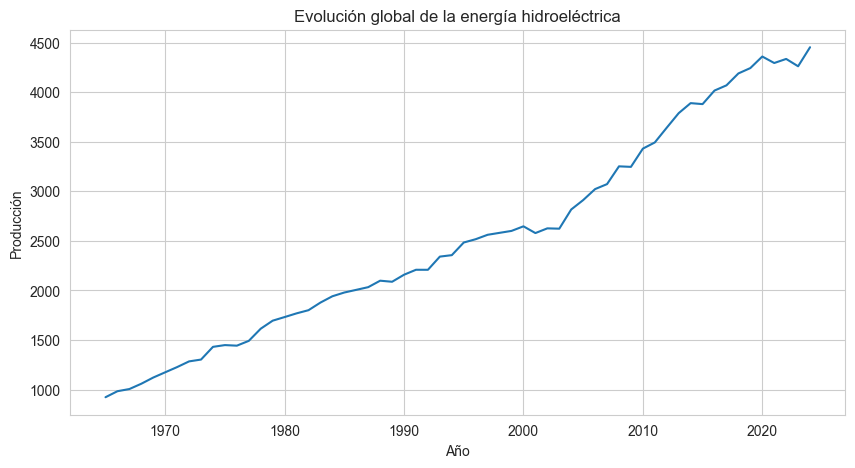

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(df_global2["Year"], df_global2["Hydropower"])
plt.title("Evolución global de la energía hidroeléctrica")
plt.xlabel("Año")
plt.ylabel("Producción")
plt.savefig("assets/evolution_hydropower.png")
plt.show()


La hidroelectricidad constituye la base histórica del mix renovable, con un crecimiento progresivo pero moderado a lo largo de las décadas.

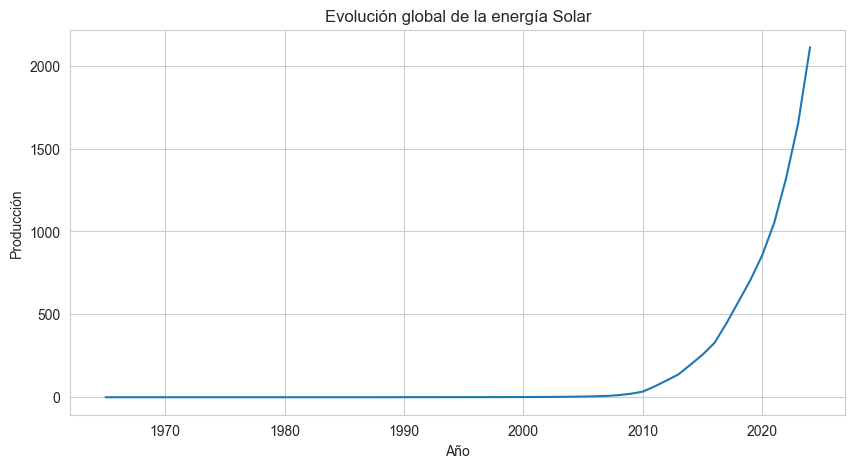

In [55]:
plt.figure(figsize=(10, 5))
plt.plot(df_global2["Year"], df_global2["Solar"])
plt.title("Evolución global de la energía Solar")
plt.xlabel("Año")
plt.ylabel("Producción")
plt.savefig("assets/evolution_solar.png")
plt.show()


La energía solar aparece tardíamente, pero muestra una clara aceleración en las últimas dos décadas, señalando una transición tecnológica reciente.

- ¿En qué año deja de ser cero?
- ¿Cuándo empieza la aceleración real?
- ¿El crecimiento parece exponencial?

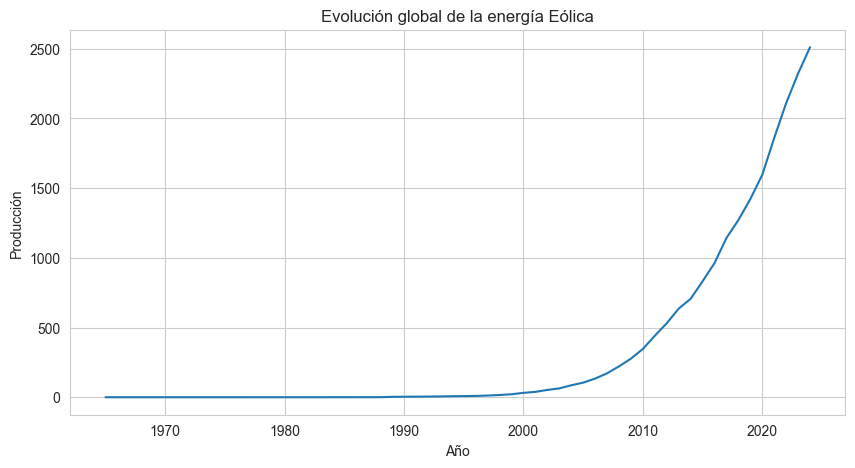

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(df_global2["Year"], df_global2["Wind"])
plt.title("Evolución global de la energía Eólica")
plt.xlabel("Año")
plt.ylabel("Producción")
plt.savefig("assets/evolution_wind.png")
plt.show()


La energía eólica muestra una adopción más temprana que la solar y un crecimiento sostenido, consolidándose como una de las principales tecnologías renovables modernas.

- ¿aparece antes?
- ¿crece más estable?
- ¿menos abrupta?

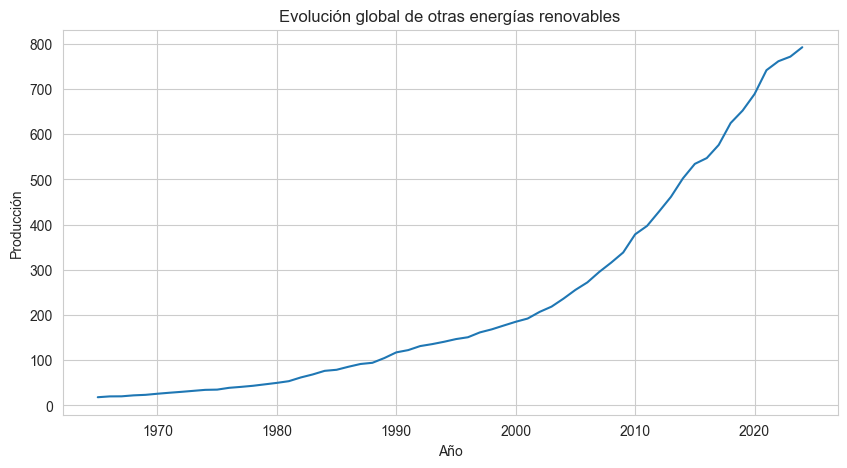

In [57]:
plt.figure(figsize=(10, 5))
plt.plot(df_global2["Year"], df_global2["Other renewables"])
plt.title("Evolución global de otras energías renovables")
plt.xlabel("Año")
plt.ylabel("Producción")
plt.savefig("assets/Other_renewables.png")
plt.show()

- agrupa tecnologías distintas
- 
No como protagonista. (incluye la bioenergía, geotérmica, la undimotriz y la maremotriz.)

# Comparación con otras tecnologías (Multivariado)

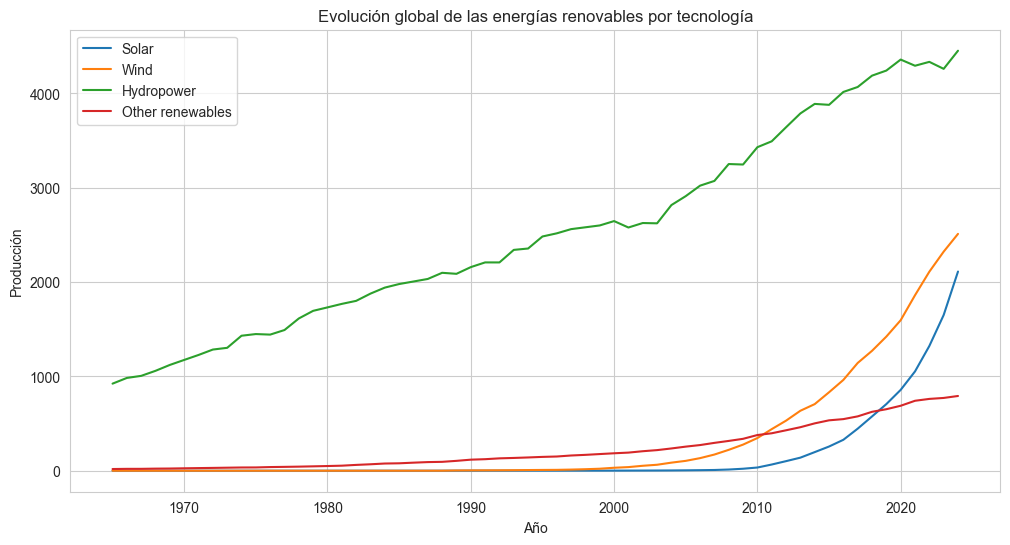

In [58]:
plt.figure(figsize=(12, 6))

plt.plot(df_global2["Year"], df_global2["Solar"], label="Solar")
plt.plot(df_global2["Year"], df_global2["Wind"], label="Wind")
plt.plot(df_global2["Year"], df_global2["Hydropower"], label="Hydropower")
plt.plot(df_global2["Year"], df_global2["Other renewables"], label="Other renewables")

plt.title("Evolución global de las energías renovables por tecnología")
plt.xlabel("Año")
plt.ylabel("Producción")
plt.savefig("assets/technology_comparison.png")
plt.legend()
plt.show()


El crecimiento total reciente no se explica por la hidroelectricidad, sino por la rápida expansión de la energía solar y eólica.

In [59]:
df_global2["Total_renewables"] = (
    df_global2["Hydropower"] +
    df_global2["Solar"] +
    df_global2["Wind"] +
    df_global2["Other renewables"]
)

for col in ["Hydropower", "Solar", "Wind", "Other renewables"]:
    df_global2[f"{col}_share"] = df_global2[col] / df_global2["Total_renewables"]


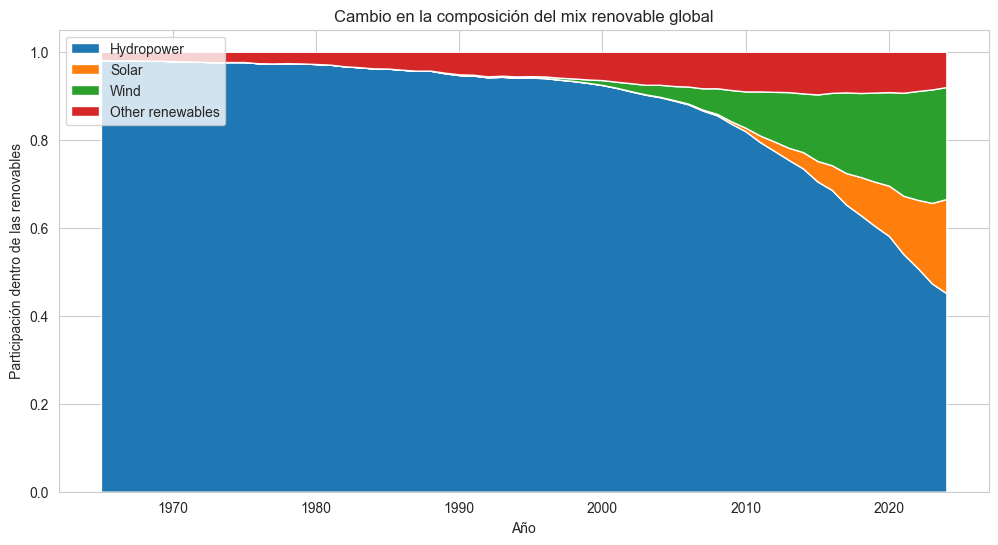

In [60]:
plt.figure(figsize=(12, 6))

plt.stackplot(
    df_global2["Year"],
    df_global2["Hydropower_share"],
    df_global2["Solar_share"],
    df_global2["Wind_share"],
    df_global2["Other renewables_share"],
    labels=["Hydropower", "Solar", "Wind", "Other renewables"]
)

plt.title("Cambio en la composición del mix renovable global")
plt.xlabel("Año")
plt.ylabel("Participación dentro de las renovables")
plt.savefig("assets/renewable_mix.png")
plt.legend(loc="upper left")
plt.show()


Aunque la hidroelectricidad sigue siendo la principal fuente renovable en términos absolutos, su peso relativo ha disminuido progresivamente, mientras que la energía solar y eólica han ganado protagonismo en el mix renovable global, especialmente a partir de la década de 2000.